In [1]:
def save_and_open_excel(dataframe, file_name="模型相關數值.xlsx"):
    """
    將給定的 dataframe 保存到指定的 Excel 工作表中，如果工作表已存在則覆蓋，
    並嘗試在支持的應用程式中打開該 Excel 文件。

    :param dataframe: 要保存的 pandas DataFrame。
    :param file_name: Excel 文件的名稱，默認為 'vif_data.xlsx'。
    """
    import pandas as pd
    import os

    # 獲取 dataframe 的變數名稱
    frame_name = [name for name, var in globals().items() if var is dataframe][0]

    # 檢查工作表是否存在，如果不存在則創建
    if not os.path.isfile(file_name):
        with pd.ExcelWriter(file_name, engine="openpyxl") as writer:
            dataframe.to_excel(writer, sheet_name=frame_name, index=False)
    else:
        # 工作表存在，加載工作簿
        with pd.ExcelWriter(
            file_name, engine="openpyxl", mode="a", if_sheet_exists="replace"
        ) as writer:
            dataframe.to_excel(writer, sheet_name=frame_name, index=False)

    # 嘗試打開創建的 Excel 文件
    try:
        os.startfile(file_name)
    except AttributeError:
        # 如果 os.startfile() 不可用（例如在非 Windows 系統上），使用適當的替代方案
        if os.name == "posix":
            os.system(f'open "{file_name}"')
        else:
            os.system(f'start "{file_name}"')
    except Exception as e:
        print(f"打開 Excel 文件時發生錯誤: {e}")

In [39]:
import pandas as pd


file_path = r".\飲料店總表.csv"

dataset = pd.read_csv(file_path, sep=",", encoding="UTF-8")
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5295 entries, 0 to 5294
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          5295 non-null   object 
 1   star                          5295 non-null   float64
 2   comment                       5295 non-null   int64  
 3   class                         5295 non-null   object 
 4   address                       5295 non-null   object 
 5   latitude                      5295 non-null   float64
 6   longitude                     5295 non-null   float64
 7   1km_bus_count                 5295 non-null   int64  
 8   1km_drink_count               5295 non-null   int64  
 9   1km_hospital_count            5295 non-null   int64  
 10  1km_movie_theater_count       5295 non-null   int64  
 11  1km_MRT_count                 5295 non-null   int64  
 12  1km_night_market_count        5295 non-null   int64  
 13  1km

In [3]:
dataset.describe().round(2)

,star,comment,latitude,longitude,1km_bus_count,1km_drink_count,1km_hospital_count,1km_movie_theater_count,1km_MRT_count,1km_night_market_count,...,500m_bus_count,500m_drink_count,500m_hospital_count,500m_movie_theater_count,500m_MRT_count,500m_night_market_count,500m_park_count,500m_school_count,500m_sports_facilities_count,500m_train_count
count,5295.00,5295.00,5295.00,5295.00,5295.00,5295.00,5295.00,5295.00,5295.00,5295.00,...,5295.00,5295.00,5295.00,5295.00,5295.00,5295.00,5295.00,5295.00,5295.00,5295.00
mean,4.03,136.19,25.04,121.51,53.18,77.35,1.02,0.76,1.61,0.56,...,16.45,29.53,0.31,0.29,0.54,0.24,4.67,1.71,2.43,0.07
std,1.04,164.70,0.08,0.10,31.39,47.03,1.29,1.24,1.40,0.72,...,10.17,18.30,0.58,0.79,0.62,0.49,2.94,1.26,2.65,0.26
min,0.00,0.00,23.14,120.08,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.80,19.00,25.01,121.46,26.00,39.00,0.00,0.00,0.00,0.00,...,8.00,16.00,0.00,0.00,0.00,0.00,3.00,1.00,0.00,0.00
50%,4.30,79.00,25.04,121.51,51.00,74.00,1.00,0.00,2.00,0.00,...,16.00,28.00,0.00,0.00,0.00,0.00,4.00,2.00,2.00,0.00
75%,4.70,193.50,25.07,121.55,79.00,111.00,2.00,1.00,2.00,1.00,...,24.00,41.00,1.00,0.00,1.00,0.00,6.00,2.00,4.00,0.00
max,5.00,998.00,25.29,122.00,130.00,214.00,7.00,7.00,6.00,5.00,...,45.00,82.00,3.00,6.00,3.00,2.00,18.00,8.00,14.00,1.00


In [47]:
# 要分析相關性的資料
# # selected_data = dataset.iloc[:, 7:36]
# selected_data = dataset.iloc[:, 7:10]
# selected_data

# 使用 concat() 函式合併資料框，axis=0 表示按列合併
merged_data = pd.concat(
    [
        dataset.iloc[:, 7:10],
        dataset.iloc[:, 11:12],
        dataset.iloc[:, 14:15],
        dataset.iloc[:, 15:16],
    ],
    axis=1,
)
selected_data = merged_data

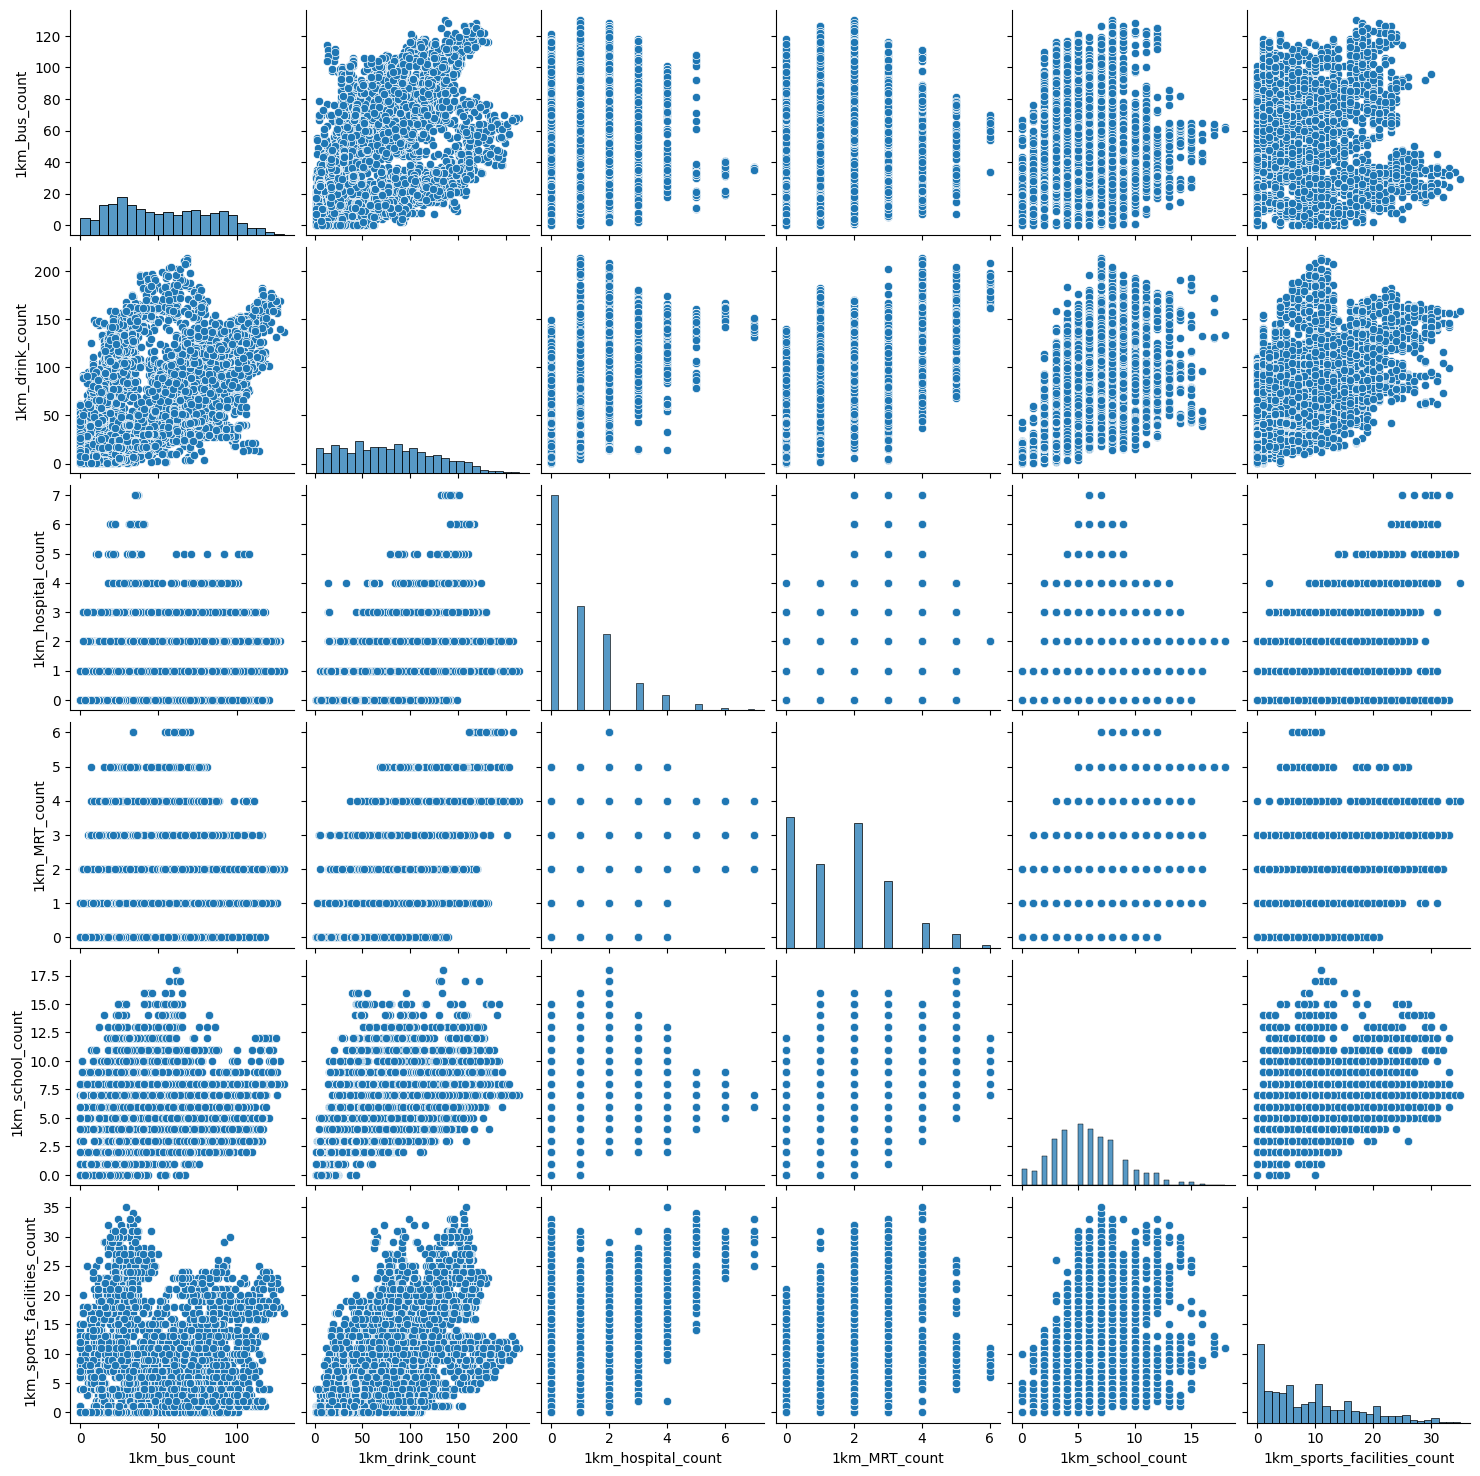

In [75]:
# 參數畫散點圖
import seaborn as sns

sns.pairplot(selected_data)

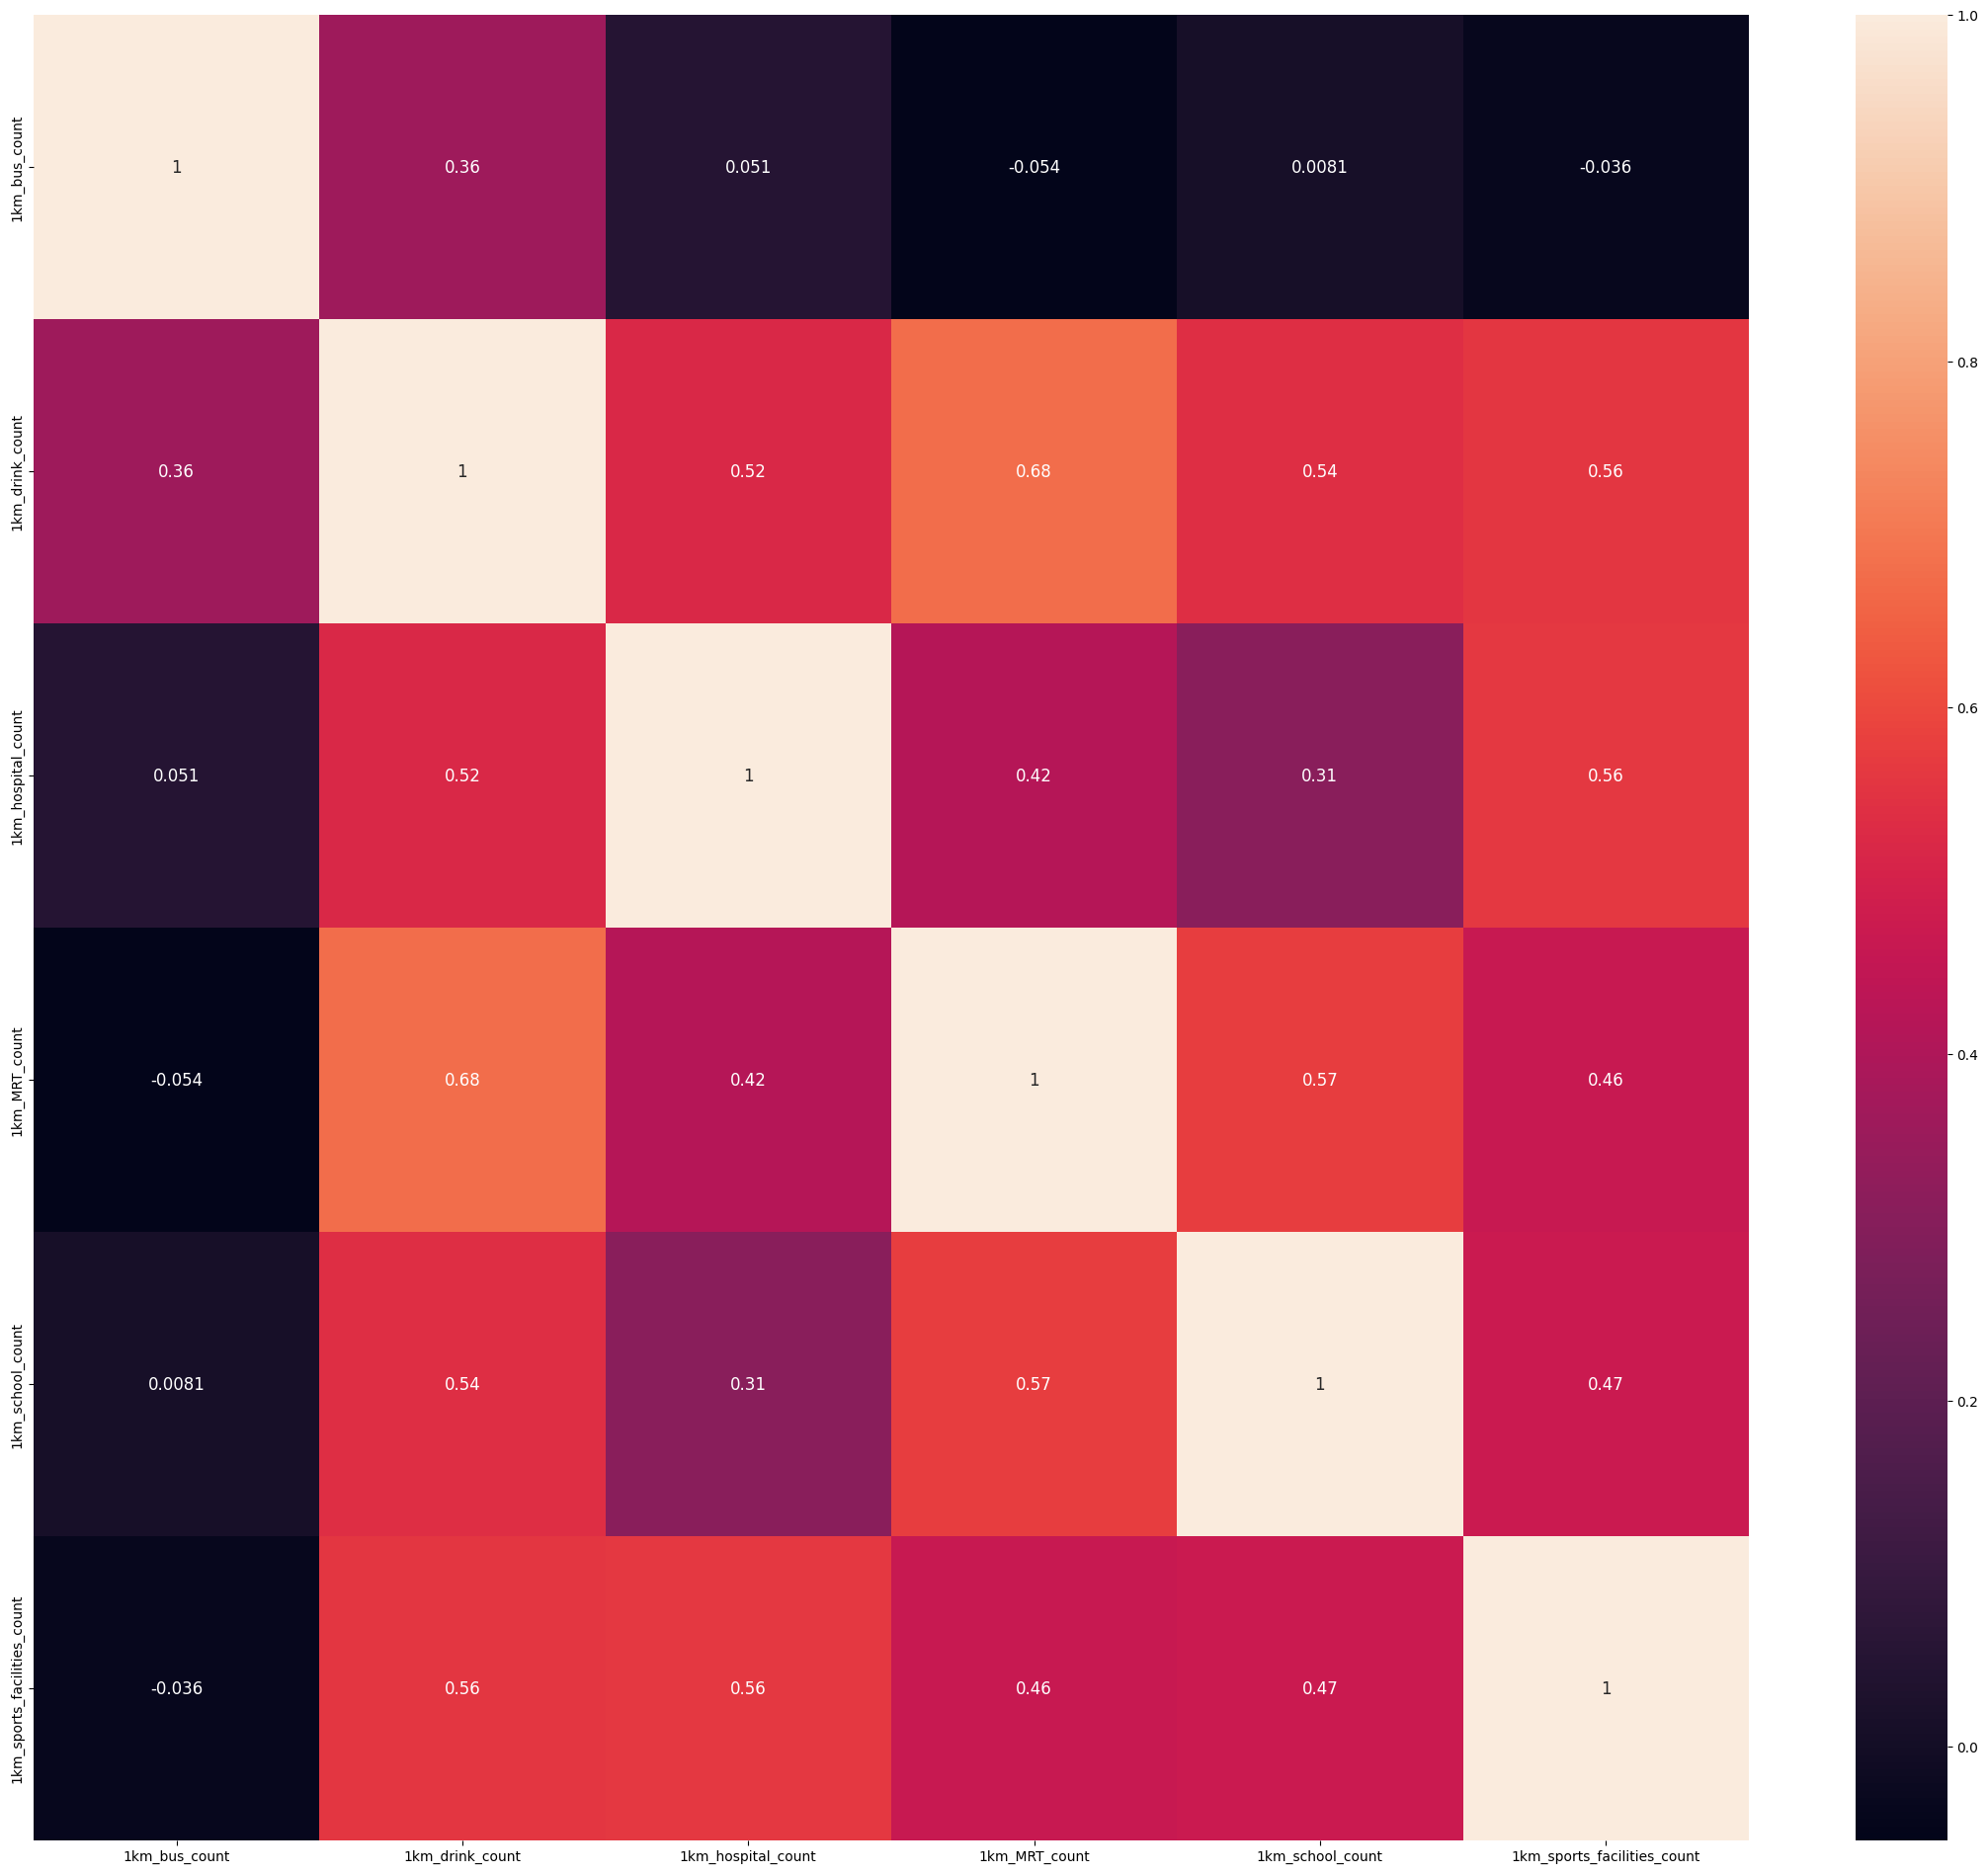

In [48]:
# 計算相關矩陣
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = selected_data.corr()

# 繪製熱力圖
plt.figure(figsize=(28, 24))
sns.heatmap(corrmat, annot=True, annot_kws={"size": 12})
plt.show()

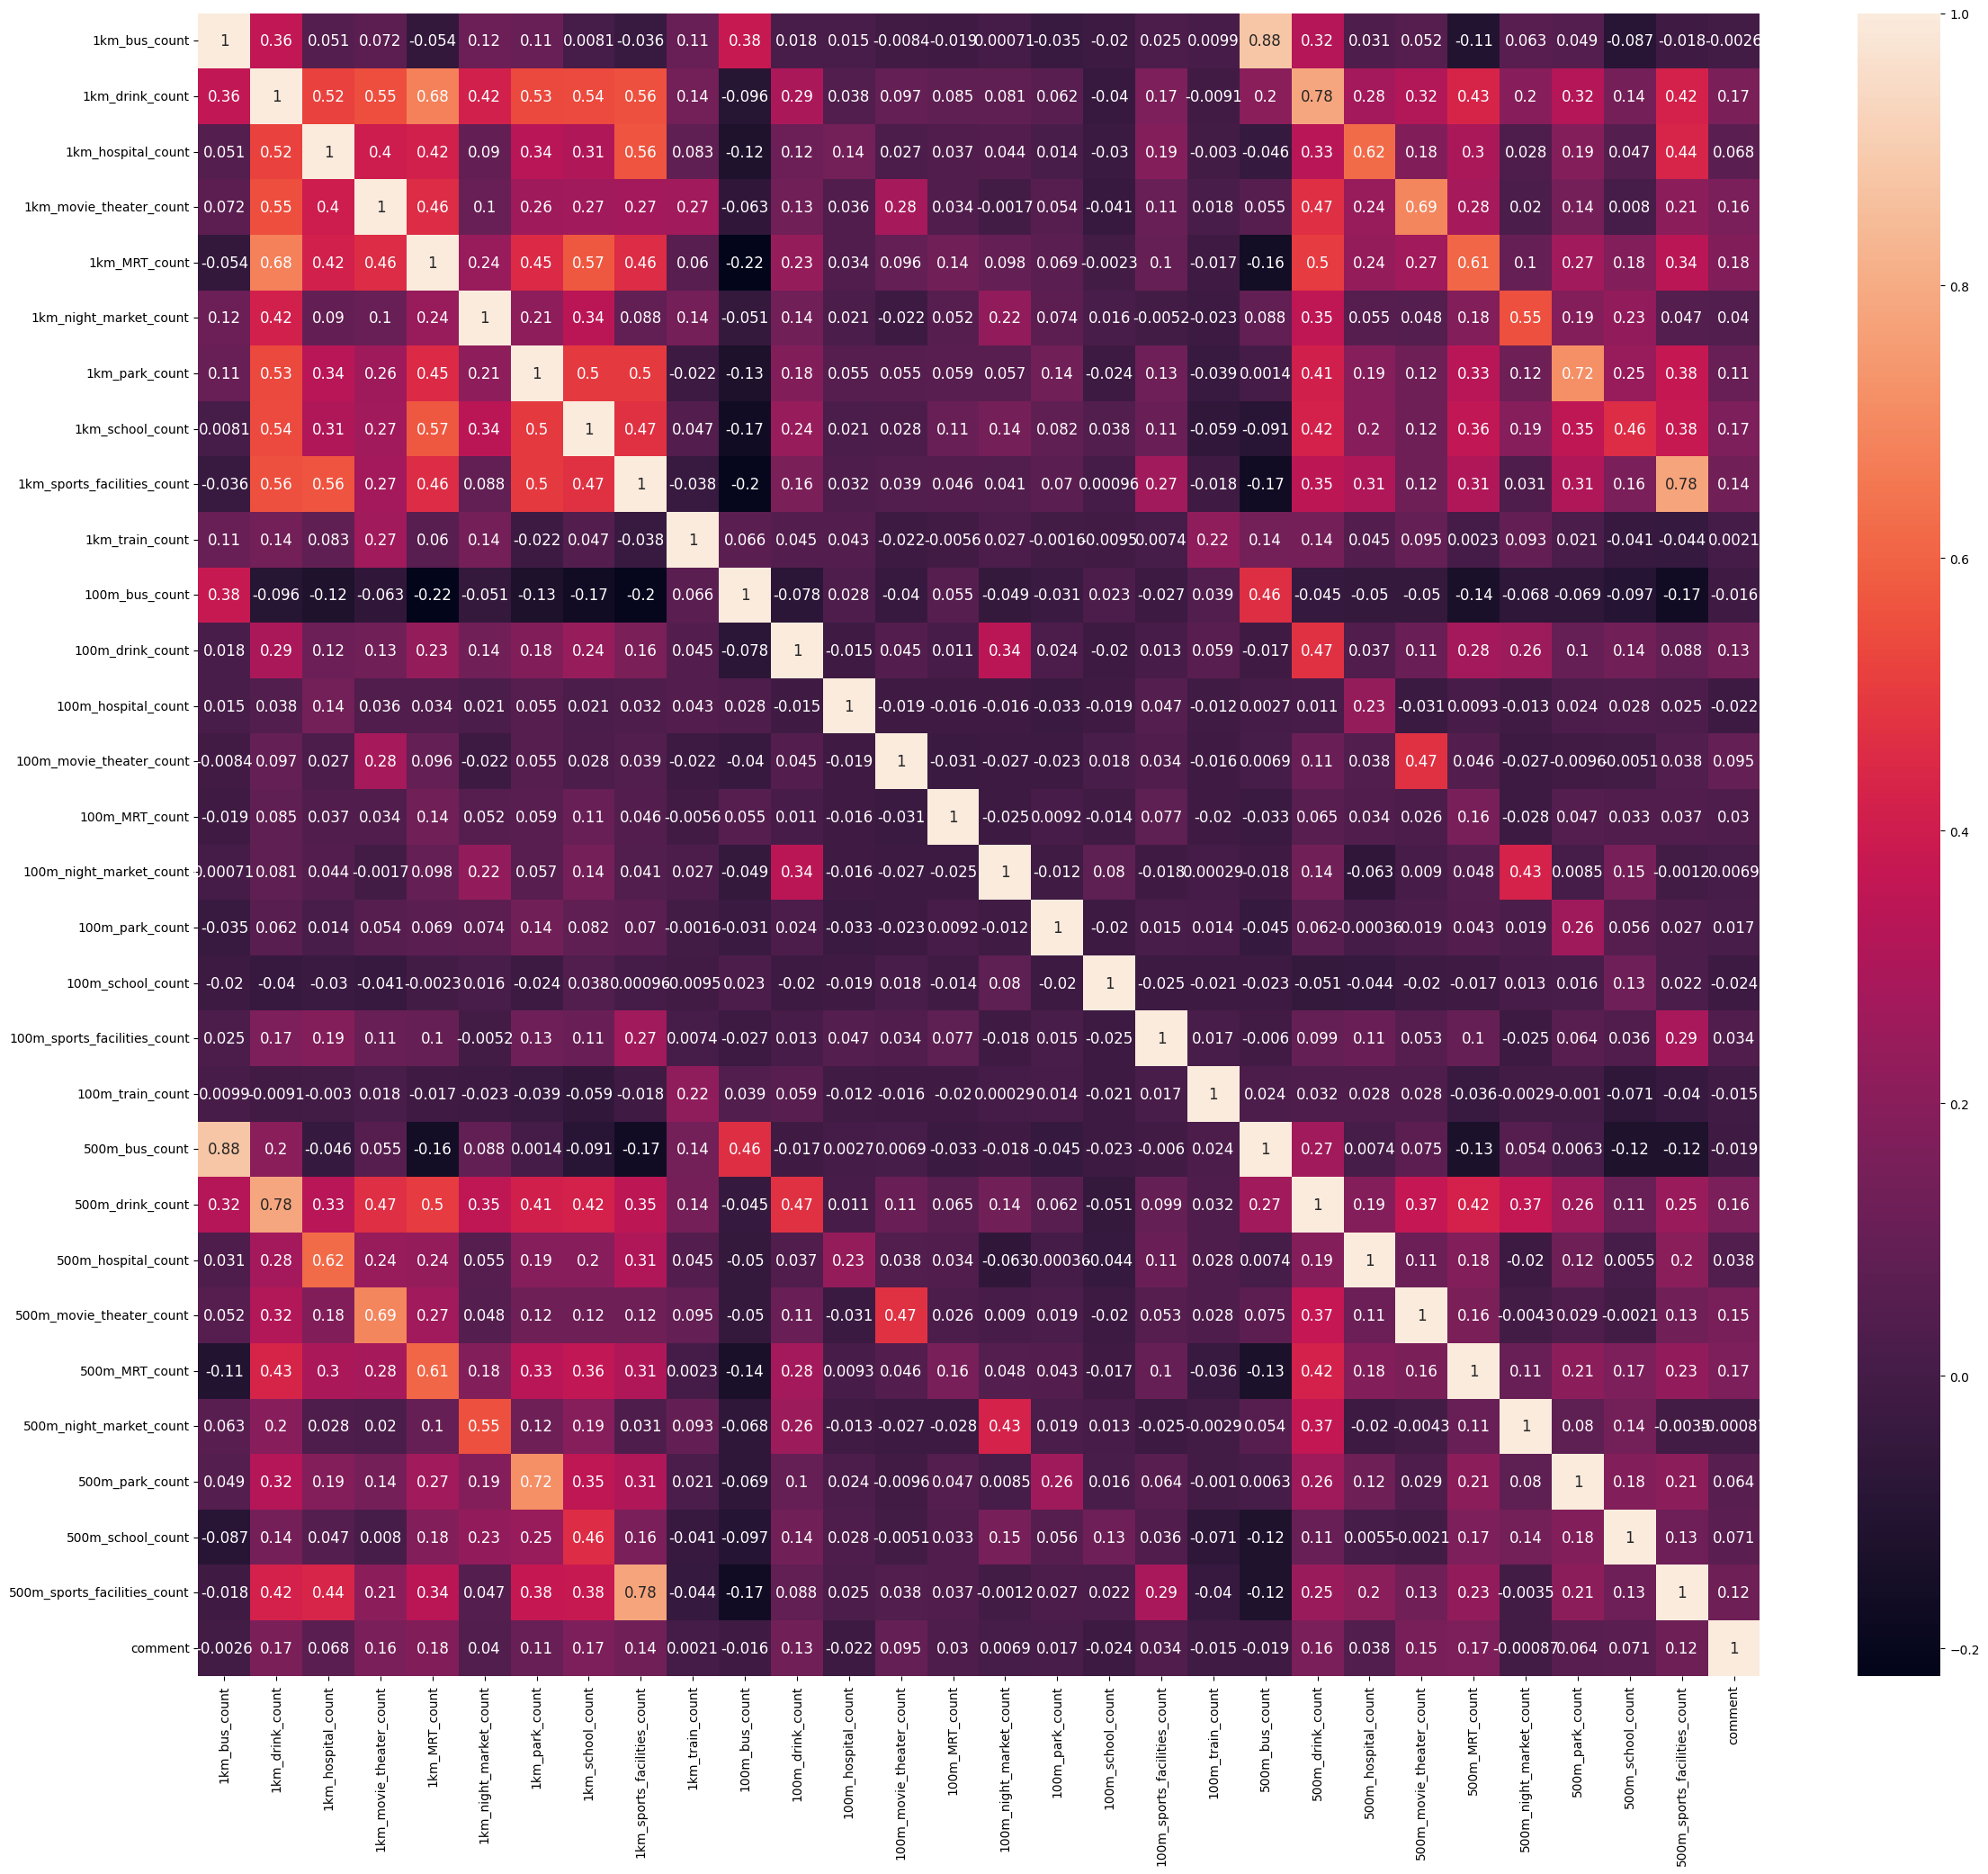

In [83]:
import pandas as pd

file_path = r".\飲料店總表.csv"
dataset = pd.read_csv(file_path, sep=",", encoding="UTF-8")

# 計算相關矩陣
import seaborn as sns
import matplotlib.pyplot as plt

merged_data_test = pd.concat(
    [dataset.iloc[:, 7:36], dataset.iloc[:, 2:3]],
    axis=1,
)
selected_data_test = merged_data_test
selected_data_test
corrmat_test = selected_data_test.corr()

# 繪製熱力圖
plt.figure(figsize=(28, 24))
sns.heatmap(corrmat_test, annot=True, annot_kws={"size": 12})
plt.show()

In [76]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

selected_data = selected_data

# 假設 dataset 是您的 DataFrame
# 首先，給數據集添加一個常數項，這對於VIF計算是必要的
dataset_with_constant = add_constant(selected_data)

# 初始化一個空的DataFrame來存儲VIF值
vif_data = pd.DataFrame()
vif_data["feature"] = dataset_with_constant.columns

# 計算每個變數的VIF值並存儲
vif_data["VIF"] = [
    variance_inflation_factor(dataset_with_constant.values, i)
    for i in range(dataset_with_constant.shape[1])
]

# save_and_open_excel(vif_data)
vif_data

,feature,VIF
0,const,7.523595
1,1km_bus_count,1.532235
2,1km_drink_count,3.516526
3,1km_hospital_count,1.626993
4,1km_MRT_count,2.458714
5,1km_school_count,1.678122
6,1km_sports_facilities_count,1.904868


In [59]:
# 設定模型輸入x
X = selected_data.iloc[:, :].values
y = dataset.iloc[:, 2].values.reshape(-1, 1)  # 轉換成1個column。從橫的轉乘直的

# 分割訓練和測試
from sklearn.model_selection import train_test_split

# test_size 切的尺寸 30% random_state讓抽取可以是穩定的結果(第一次抽根第十次抽是一樣的)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=25
)

### 模型

## Linear Regression

In [62]:
"""
1.建立空模型
2.擬合
"""

from sklearn.linear_model import LinearRegression

regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

from sklearn.metrics import r2_score

y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

from sklearn.metrics import mean_squared_error
import numpy as np

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_linear_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_linear_test))

print("R2_score (train): ", r2_score_linear_train)
print("R2_score (test): ", r2_score_linear_test)
print("RMSE_score (train): ", rmse_train)
print("RMSE_score (test): ", rmse_test)

R2_score (train):  0.042469074878931035
R2_score (test):  0.04087370392103573
RMSE_score (train):  161.22688331912588
RMSE_score (test):  161.05948761207193


In [63]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     39.42
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           3.75e-47
Time:                        17:13:01   Log-Likelihood:                -34423.
No. Observations:                5295   AIC:                         6.886e+04
Df Residuals:                    5288   BIC:                         6.891e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.3815      6.077     13.391      0.0

## Polynomial regression

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
from sklearn.metrics import mean_squared_error

In [65]:
from sklearn.preprocessing import (
    PolynomialFeatures,
)  # 從sklearn的preprocessing模組中導入PolynomialFeatures類，用於生成一個新的特徵矩陣，其中包含所有多項式組合的特徵，其次數小於或等於指定的度數。

poly_reg = PolynomialFeatures(
    degree=3
)  # 創建一個PolynomialFeatures的實例poly_reg，指定多項式的度數為2。

X_poly = poly_reg.fit_transform(X_train)  # 對訓練數據X_train進行變換，生成多項式特徵。

regressor_poly2 = LinearRegression()  # 創建一個線性回歸(Linear Regression)模型的實例。

regressor_poly2.fit(
    X_poly, y_train
)  # 使用包含多項式特徵的X_poly和訓練集的目標值y_train來訓練線性回歸模型。

y_pred_poly2_train = regressor_poly2.predict(
    poly_reg.fit_transform(X_train)
)  # 對訓練集進行預測。

r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)  # 計算訓練集的R^2分數。

y_pred_poly2_test = regressor_poly2.predict(
    poly_reg.fit_transform(X_test)
)  # 對測試集進行預測。

r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)  # 計算測試集的R^2分數。

rmse_train = np.sqrt(
    mean_squared_error(y_train, y_pred_poly2_train)
)  # 計算訓練集的均方根誤差(RMSE)。

rmse_test = np.sqrt(
    mean_squared_error(y_test, y_pred_poly2_test)
)  # 計算測試集的均方根誤差(RMSE)。
print("R2_score (train): ", r2_score_poly2_train)
print("R2_score (test): ", r2_score_poly2_test)
print("RMSE: ", rmse_train)
print("RMSE: ", rmse_test)

R2_score (train):  0.07868303524436648
R2_score (test):  0.028811672222154416
RMSE:  158.14868612212464
RMSE:  162.06907043072468


In [66]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# 假設您有一個訓練集 X_train 和目標值 y_train
# 創建多項式特徵
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# 使用Lasso正則化
alpha_lasso = 0.01  # 正則化參數
lasso_model = Lasso(alpha=alpha_lasso)
lasso_model.fit(X_poly_train, y_train)

# 進行預測
y_pred_lasso_train = lasso_model.predict(X_poly_train)
y_pred_lasso_test = lasso_model.predict(X_poly_test)

# 計算R^2分數
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# 計算均方根誤差(RMSE)
rmse_lasso_train = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))

print("Lasso正則化:")
print("R2_score (train): ", r2_score_lasso_train)
print("R2_score (test): ", r2_score_lasso_test)
print("RMSE: ", rmse_lasso_train)
print("RMSE: ", rmse_lasso_test)

"""
# 使用Ridge正則化
alpha_ridge = 0.01  # 正則化參數
ridge_model = Ridge(alpha=alpha_ridge)
ridge_model.fit(X_poly, y_train)


y_pred_ridge = ridge_model.predict(X_poly)
r2_score_ridge = r2_score(y_train, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_train, y_pred_ridge))

print("\nRidge正則化:")
print("R2分數:", r2_score_ridge)

print("RMSE:", rmse_ridge)
"""

Lasso正則化:
R2_score (train):  0.0731202492425378
R2_score (test):  0.031787901786873185
RMSE:  158.6254076937364
RMSE:  161.82054763686878


c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.663e+07, tolerance: 1.006e+04
  model = cd_fast.enet_coordinate_descent(


'\n# 使用Ridge正則化\nalpha_ridge = 0.01  # 正則化參數\nridge_model = Ridge(alpha=alpha_ridge)\nridge_model.fit(X_poly, y_train)\n\n\ny_pred_ridge = ridge_model.predict(X_poly)\nr2_score_ridge = r2_score(y_train, y_pred_ridge)\nrmse_ridge = np.sqrt(mean_squared_error(y_train, y_pred_ridge))\n\nprint("\nRidge正則化:")\nprint("R2分數:", r2_score_ridge)\n\nprint("RMSE:", rmse_ridge)\n'

In [67]:
import pandas as pd

"""
測試 alpha_range 到 10
發現 R2_score 依舊 不達 3%
"""
alpha_values = []
r2_score_train_values = []
r2_score_test_values = []
rmse_train_values = []
rmse_test_values = []

# 定義alpha_lasso的範圍和增量
alpha_range = np.arange(0.01, 10.01, 0.05)

for alpha_lasso in alpha_range:
    # 使用Lasso正則化
    lasso_model = Lasso(alpha=alpha_lasso)
    lasso_model.fit(X_poly_train, y_train)

    # 進行預測
    y_pred_lasso_train = lasso_model.predict(X_poly_train)
    y_pred_lasso_test = lasso_model.predict(X_poly_test)

    # 計算R^2分數
    r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)
    r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

    # 計算均方根誤差(RMSE)
    rmse_lasso_train = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
    rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))

    # 將結果添加到列表中
    alpha_values.append(alpha_lasso)
    r2_score_train_values.append(r2_score_lasso_train)
    r2_score_test_values.append(r2_score_lasso_test)
    rmse_train_values.append(rmse_lasso_train)
    rmse_test_values.append(rmse_lasso_test)

# 創建DataFrame來存儲結果
results_df = pd.DataFrame(
    {
        "Alpha": alpha_values,
        "R2 Score (Train)": r2_score_train_values,
        "R2 Score (Test)": r2_score_test_values,
        "RMSE (Train)": rmse_train_values,
        "RMSE (Test)": rmse_test_values,
    }
)

# 輸出結果表
print(results_df)

c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.663e+07, tolerance: 1.006e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.664e+07, tolerance: 1.006e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check t

     Alpha  R2 Score (Train)  R2 Score (Test)  RMSE (Train)  RMSE (Test)
0     0.01          0.073120         0.031788    158.625408   161.820548
1     0.06          0.073147         0.031826    158.623081   161.817393
2     0.11          0.073188         0.031850    158.619621   161.815362
3     0.16          0.073217         0.031875    158.617091   161.813275
4     0.21          0.073235         0.031895    158.615553   161.811624
..     ...               ...              ...           ...          ...
195   9.76          0.070603         0.034400    158.840642   161.602096
196   9.81          0.070597         0.034404    158.841185   161.601806
197   9.86          0.070591         0.034407    158.841729   161.601530
198   9.91          0.070584         0.034410    158.842273   161.601267
199   9.96          0.070578         0.034413    158.842818   161.601015

[200 rows x 5 columns]


c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.690e+07, tolerance: 1.006e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.690e+07, tolerance: 1.006e+04
  model = cd_fast.enet_coordinate_descent(


## Ridge regression

In [68]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [69]:
ridgeReg = Ridge(alpha=5.5)  # 創建 Ridge 回歸模型的一個實例，指定 alpha 參數為 5.5

ridgeReg.fit(X_train, y_train)  # 使用訓練數據進行擬合，訓練 Ridge 回歸模型

y_pred_ridge_train = ridgeReg.predict(X_train)  # 對訓練集進行預測

r2_score_ridge_train = ridgeReg.score(X_train, y_train)  # 計算訓練集上的 R2 分數

y_pred_ridge_test = ridgeReg.predict(X_test)  # 對測試集進行預測

r2_score_ridge_test = ridgeReg.score(X_test, y_test)  # 計算測試集上的 R2 分數

rmse_ridge_train = np.sqrt(
    mean_squared_error(y_train, y_pred_ridge_train)
)  # 計算訓練集的均方根誤差(RMSE)

rmse_ridge_test = np.sqrt(
    mean_squared_error(y_test, y_pred_ridge_test)
)  # 計算測試集的均方根誤差(RMSE)

# print("coef：")
# for i, j in zip(dataset.columns, ridgeReg.coef_[0]):  # 逐一列出模型的係數
#     print(i, j)
print("R2_score (train): ", r2_score_ridge_train)
print("R2_score (test): ", r2_score_ridge_test)
print("RMSE: ", rmse_ridge_train)
print("RMSE: ", rmse_ridge_test)

R2_score (train):  0.04246905997383432
R2_score (test):  0.0408759986578231
RMSE:  161.22688457396904
RMSE:  161.05929494226726


In [70]:
import pandas as pd

"""
測試 alpha_range 到 10
發現 R2_score 依舊 不達 1%
"""
alpha_values = []
r2_score_train_values = []
r2_score_test_values = []
rmse_train_values = []
rmse_test_values = []

# 定義alpha_ridge的範圍和增量
alpha_ridge = np.arange(0.01, 10.01, 0.05)

for alpha in alpha_ridge:
    # 使用Ridge正則化
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_poly, y_train)

    # 進行預測
    y_pred_ridge_train = ridge_model.predict(X_poly_train)
    y_pred_ridge_test = ridge_model.predict(X_poly_test)

    # 計算R^2分數
    r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)
    r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

    # 計算均方根誤差(RMSE)
    rmse_ridge_train = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
    rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))

    # 將結果添加到列表中
    alpha_values.append(alpha)
    r2_score_train_values.append(r2_score_ridge_train)
    r2_score_test_values.append(r2_score_ridge_test)
    rmse_train_values.append(rmse_ridge_train)
    rmse_test_values.append(rmse_ridge_test)

# 創建DataFrame來存儲結果
results_df = pd.DataFrame(
    {
        "Alpha": alpha_values,
        "R2 Score (Train)": r2_score_train_values,
        "R2 Score (Test)": r2_score_test_values,
        "RMSE (Train)": rmse_train_values,
        "RMSE (Test)": rmse_test_values,
    }
)

# 輸出結果表
print(results_df)

c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=6.88156e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.12893e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=7.56971e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.10105e-17): result may not be accurate.
  return lina

     Alpha  R2 Score (Train)  R2 Score (Test)  RMSE (Train)  RMSE (Test)
0     0.01          0.078683         0.028812    158.148686   162.069023
1     0.06          0.078683         0.028815    158.148687   162.068784
2     0.11          0.078683         0.028818    158.148689   162.068549
3     0.16          0.078683         0.028821    158.148691   162.068316
4     0.21          0.078683         0.028823    158.148695   162.068086
..     ...               ...              ...           ...          ...
195   9.76          0.078583         0.029051    158.157260   162.049085
196   9.81          0.078582         0.029052    158.157319   162.049050
197   9.86          0.078582         0.029052    158.157378   162.049016
198   9.91          0.078581         0.029052    158.157437   162.048982
199   9.96          0.078580         0.029053    158.157496   162.048948

[200 rows x 5 columns]


## RF隨機森林

In [71]:
# 設定模型輸入x
X = dataset.iloc[:, 7:36].values
y = dataset.iloc[:, 2].values.reshape(-1, 1)  # 轉換成1個column。從橫的轉乘直的

# 分割訓練和測試
from sklearn.model_selection import train_test_split

# test_size 切的尺寸 30% random_state讓抽取可以是穩定的結果(第一次抽根第十次抽是一樣的)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=25
)

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 分割數據集為訓練集和測試集
# X = selected_features.drop('comment', axis=1)  # 特徵
# y = selected_features['comment']  # 預測目標

# 分割數據，80%用於訓練，20%用於測試
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用隨機森林回歸模型
rf_model = RandomForestRegressor(n_estimators=100)
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 預測測試集
y_pred = rf_model.predict(X_test)

# 計算訓練集的性能指標
mse_train = mean_squared_error(y_train, rf_model.predict(X_train))
r2_train = r2_score(y_train, rf_model.predict(X_train))
rmse_train = np.sqrt(mse_train)

# 計算測試集的性能指標
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mse_test)

# 列印指標

print("R2_score (train): ", r2_train)
print("R2_score (test): ", r2_test)
print("RMSE (train): ", rmse_train)
print("RMSE (test): ", rmse_test)

c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R2_score (train):  0.8477873375676659
R2_score (test):  0.023776314626869466
RMSE (train):  64.2815655649395
RMSE (test):  162.48867013653546


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 轉換評論數為二分類目標
y_class = (y > y.median()).astype(int)  # 將評論數量高於中位數視為一類，其餘為另一類

# 分割數據
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)

# 建立隨機森林分類模型
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_class, y_train_class)

# 進行預測
y_pred_class = rf_classifier.predict(X_test_class)

# 計算準確率和其他性能指標
accuracy_class = accuracy_score(y_test_class, y_pred_class)
classification_report_class = classification_report(y_test_class, y_pred_class)

accuracy_class, classification_report_class